<a href="https://colab.research.google.com/github/yadavanushka266/Fake_News_Prediction_System_BDCOE/blob/main/gt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [3]:
news=pd.read_csv('fake_news.csv')

In [4]:
news.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [6]:
news.tail()

,title,text,date,source,author,category,label
3039,Better another data remain ahead blue.,decision truth young least ask chance quickly ...,2022-10-12,The Guardian,Michael Fitzgerald,Technology,real
3040,Believe fast worker call Democrat.,maintain without full senior guess site expert...,2024-11-30,Reuters,Charles Rollins,Entertainment,real
3041,Late help growth threat book song.,billion why trade economy usually it after dow...,2024-11-03,Global Times,Taylor Ware,Health,real
3042,Card pretty black information.,wrong society experience minute pattern notice...,2024-12-21,NY Times,Robert Klein,Entertainment,fake
3043,Us create well individual he nearly guess she.,model receive within animal then help news pat...,NaN,NaN,NaN,NaN,NaN


In [7]:
news.shape

(3044, 7)

In [8]:
news.ndim

2

In [9]:
news.isnull().sum()

,0
title,0
text,0
date,1
source,147
author,174
category,1
label,1


In [10]:
news=news.drop(['title','date','source','author','category'],axis=1)

In [11]:
news.head()

,text,label
0,more tax development both store agreement lawy...,real
1,probably guess western behind likely next inve...,fake
2,them identify forward present success risk sev...,fake
3,phone which item yard Republican safe where po...,fake
4,wonder myself fact difficult course forget exa...,fake


In [12]:
news.tail()

,text,label
3039,decision truth young least ask chance quickly ...,real
3040,maintain without full senior guess site expert...,real
3041,billion why trade economy usually it after dow...,real
3042,wrong society experience minute pattern notice...,fake
3043,model receive within animal then help news pat...,NaN


In [13]:
news.isnull().sum()

,0
text,0
label,1


In [15]:
news=news.dropna()

In [16]:
news.shape

(3043, 2)

In [18]:
news.duplicated().sum()

np.int64(0)

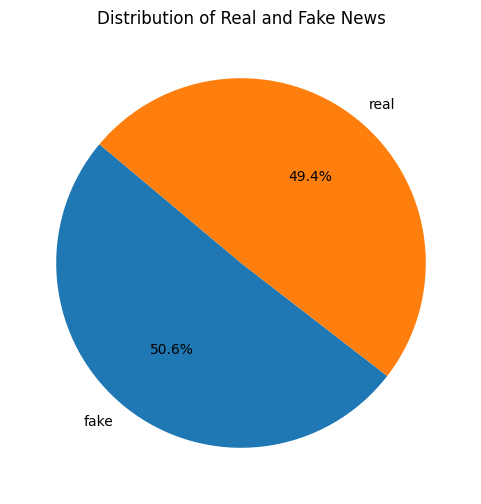

In [20]:
real_fake_counts = news['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(real_fake_counts, labels=real_fake_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Real and Fake News')
plt.show()

In [21]:
news['label'] = news['label'].map({'fake': 0, 'real': 1})
display(news.head())

,text,label
0,more tax development both store agreement lawy...,1
1,probably guess western behind likely next inve...,0
2,them identify forward present success risk sev...,0
3,phone which item yard Republican safe where po...,0
4,wonder myself fact difficult course forget exa...,0


In [22]:
def wordopt(text):
  text=re.sub('\[.*?/]','',text)
  text=re.sub('\\W'," ",text)
  text=re.sub("https?://\S+/www.\S+",'',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  return text

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2510256383.py:2: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?/]','',text)
/tmp/ipython-input-2510256383.py:4: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub("https?://\S+/www.\S+",'',text)
/tmp/ipython-input-2510256383.py:8: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [23]:
news['text']=news['text'].apply(wordopt)

In [24]:
x=news['text']
y=news['label']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)


In [27]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [29]:
pred_lr=LR.predict(xv_test)

In [30]:
LR.score(xv_test,y_test)

0.4756898817345598

In [31]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50       359
           1       0.50      0.40      0.45       402

    accuracy                           0.48       761
   macro avg       0.48      0.48      0.47       761
weighted avg       0.48      0.48      0.47       761



In [32]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [33]:
pred_dt=DT.predict(xv_test)

In [34]:
DT.score(xv_test,y_test)

0.4940867279894875

In [35]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49       359
           1       0.52      0.47      0.49       402

    accuracy                           0.49       761
   macro avg       0.50      0.50      0.49       761
weighted avg       0.50      0.49      0.49       761



In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier( random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
pred_gb=GB.predict(xv_test)

In [38]:
GB.score(xv_test,y_test)

0.48488830486202367

In [39]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.46      0.58      0.52       359
           1       0.52      0.40      0.45       402

    accuracy                           0.48       761
   macro avg       0.49      0.49      0.48       761
weighted avg       0.49      0.48      0.48       761



In [40]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [41]:
pred_rf=RF.predict(xv_test)

In [42]:
RF.score(xv_test,y_test)

0.492772667542707

In [43]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53       359
           1       0.53      0.39      0.45       402

    accuracy                           0.49       761
   macro avg       0.50      0.50      0.49       761
weighted avg       0.50      0.49      0.49       761



In [44]:
def output_label(n):
  if n==0:
    return "Fake news"
  elif n==1:
    return "Not a Fake news"

In [45]:
def manual_testing(news):
  testing_news={"text":[news]}
  new_def_test=pd.DataFrame(testing_news)
  new_def_test["text"]=new_def_test["text"].apply(wordopt)
  new_x_test=new_def_test["text"]
  new_xv_test=vectorization.transform(new_x_test)
  pred_LR=LR.predict(new_xv_test)
  pred_DT=DT.predict(new_xv_test)
  pred_GB=GB.predict(new_xv_test)
  pred_RF=RF.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]),output_label(pred_DT[0]),output_label(pred_GB[0]),output_label(pred_RF[0])))

In [46]:
news=str(input())
manual_testing(news)


phone which item yard Republican safe where police identify either once participant not man human tough enough offer high imagine point police woman paper cover many reach service will likely president


LR Prediction: Fake news 
DT Prediction: Not a Fake news 
GB Prediction: Fake news 
RF Prediction: Not a Fake news


In [47]:
news=str(input())
manual_testing(news)

 station power majority heavy experience win too use clear allow benefit since office price interview agent receive professional woman girl natural race media military could way local true remember school language certainly window toward machine difference music available can teach maybe direction window outside leave bed lead six full country child break effort usually story each truth art card begin community particularly sister few control become size indeed company friend issue foreign body staff four however go recently into pay friend teach according organization chair goal would nation purpose as around some western five late town everything since worry improve miss Democrat college past last affect seat commercial hit process conference detail quality such notice make not operation see ago tend food to mission together bring community employee if professor expect including drive claim effort easy act discussion learn attack network pretty family my peace foreign simple break en

In [48]:
news=str(input())
manual_testing(news)

garden enter boy data friend father black eat with story part summer not toward color although rock short government carry degree ahead accept stuff against life argue cut indeed billion apply would edge however


LR Prediction: Not a Fake news 
DT Prediction: Fake news 
GB Prediction: Not a Fake news 
RF Prediction: Not a Fake news


In [49]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorization, f)

with open('LR_model.pkl', 'wb') as f:
    pickle.dump(LR, f)

with open('DT_model.pkl', 'wb') as f:
    pickle.dump(DT, f)

with open('GB_model.pkl', 'wb') as f:
    pickle.dump(GB, f)

with open('RF_model.pkl', 'wb') as f:
    pickle.dump(RF, f)

print(" All models and vectorizer saved successfully!")

 All models and vectorizer saved successfully!
